Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['class'] = iris.target

In [9]:
data = data[['sepal length (cm)', 'sepal width (cm)', 'class']]
data

,sepal length (cm),sepal width (cm),class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


Дискриминантный анализ

In [10]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

In [11]:
data_train

,sepal length (cm),sepal width (cm),class
136,6.3,3.4,2
27,5.2,3.5,0
110,6.5,3.2,2
144,6.7,3.3,2
91,6.1,3.0,1
...,...,...,...
103,6.3,2.9,2
15,5.7,4.4,0
1,4.9,3.0,0
72,6.3,2.5,1


In [12]:
data_test

,sepal length (cm),sepal width (cm),class
108,6.7,2.5,2
23,5.1,3.3,0
148,6.2,3.4,2
62,6.0,2.2,1
32,5.2,4.1,0
118,7.7,2.6,2
20,5.4,3.4,0
123,6.3,2.7,2
81,5.5,2.4,1
85,6.0,3.4,1


In [13]:
y_train, y_test = data_train['class'], data_test['class']
del data_train['class']
del data_test['class']

In [14]:
data_train

,sepal length (cm),sepal width (cm)
136,6.3,3.4
27,5.2,3.5
110,6.5,3.2
144,6.7,3.3
91,6.1,3.0
...,...,...
103,6.3,2.9
15,5.7,4.4
1,4.9,3.0
72,6.3,2.5


In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [16]:
lda = LinearDiscriminantAnalysis()

In [17]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [18]:
lda.predict(data_test)

array([2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 0, 0, 2, 0, 0])

In [19]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
result

,0,1
0,2,2
1,0,0
2,2,1
3,1,1
4,0,0
5,2,2
6,0,0
7,2,2
8,1,1
9,1,1


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test, lda.predict(data_test))

0.8333333333333334

Значит, вероятность ошибки модели составляет 17% и, следовательно, двух параметров для определения класса не хватает.

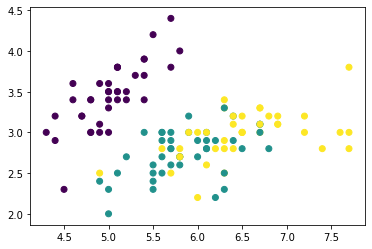

In [23]:
plt.scatter(data_train['sepal length (cm)'], data_train['sepal width (cm)'], c=y_train)
plt.show()

In [24]:
small_train = data_train
sy_train = y_train
small_test = data_test
sy_test = y_test

In [26]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

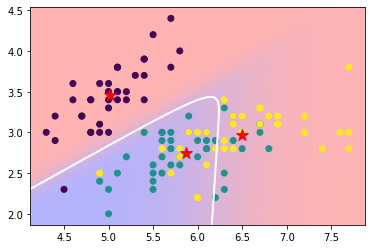

In [27]:
plt.scatter(data_train['sepal length (cm)'], data_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

Кластерный анализ

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [30]:
data_k = data[['sepal length (cm)', 'sepal width (cm)']]
data_k

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


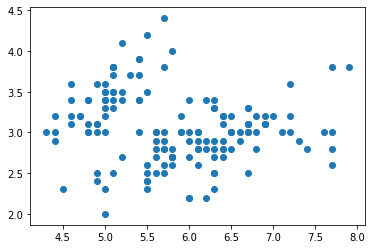

In [31]:
plt.scatter(data_k['sepal length (cm)'], data_k['sepal width (cm)'])
plt.show()

In [32]:
scaler = StandardScaler()

In [33]:
X = data_k

In [34]:
X_scaled = scaler.fit_transform(X)

In [35]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)

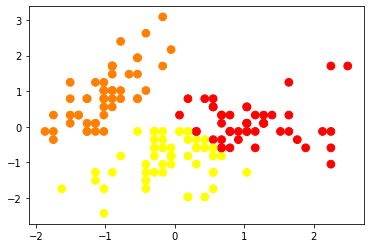

In [36]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [37]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

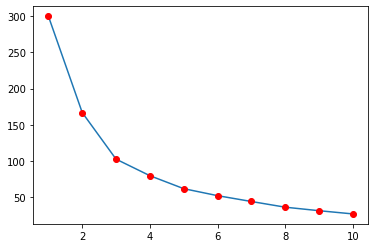

In [38]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Судя по графику, оптимальное количество кластеров - около 5